In [1]:
import numpy as np
import serial
import time
import matplotlib.pyplot as plt


------------

para envio de datos convencional

In [2]:
ser = serial.Serial('COM2',115200,bytesize=serial.EIGHTBITS,parity=serial.PARITY_NONE,stopbits=serial.STOPBITS_ONE,timeout=None)    

In [3]:
print(ser.name)         
if ser.isOpen():
    ser.close()
ser.open()
ser.isOpen()

COM2


True

Protocolo uFisio __NEW__

In [4]:
def envio_sync():
    trama_sincronismo = bytes([0x23,0x23,0x0D,0x0A])
    #trama_sincronismo = bytes([0x23,0x23,0x0D])
    env = ser.write(trama_sincronismo)

def envio_dato(dato_ECG,dato_PPG):    
    dato_ECG_bin = (dato_ECG).to_bytes(2,'big',signed=False)
    dato_PPG_bin = (dato_PPG).to_bytes(2,'big',signed=False)
    trama = bytes([dato_ECG_bin[0],dato_ECG_bin[1],dato_PPG_bin[0],dato_PPG_bin[1]])
    env = ser.write(trama)                  

------------

(0.0, 2000.0)

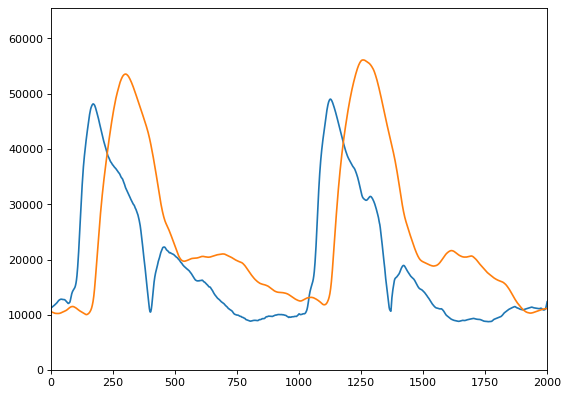

In [5]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
carotida = list()
femoral = list()
data = np.genfromtxt('signal_example.txt', delimiter=' ')

carotida = data[:,1]
femoral = data[:,3]

carotida = (carotida-np.min(carotida))/20
femoral = (femoral-np.min(femoral))/32

plt.plot(range(0,len(carotida)), carotida.astype(int), range(0,len(femoral)), femoral.astype(int))
plt.ylim([0,65535])
plt.xlim([0,2000])

In [6]:
tiempo_anterior = 0
tiempo_medido = 0

fs = 1000

while True:
    for index in range(0,len(carotida)):
        if index%10 == 0:
            envio_sync()

            tiempo_anterior = time.time()
            while tiempo_medido < (1/fs):
                tiempo_medido = time.time()-tiempo_anterior
            tiempo_medido = 0


        envio_dato(int(carotida[index]),int(femoral[index]))

        tiempo_anterior = time.time()
        while tiempo_medido < (1/fs):
            tiempo_medido = time.time()-tiempo_anterior
        tiempo_medido = 0
    

KeyboardInterrupt: 